In [1]:
import kplr 
client = kplr.API() 
koi = client.koi(97.01) # Find the target KOI.
lcs = koi.get_light_curves(short_cadence=False) # Get list of datasets.
f = lcs[0].open() # open the first light-curve dataset 
hdu_data = f[1].data
time = hdu_data["time"] # get the time of each observation 
flux = hdu_data["sap_flux"] # get the flux 
flux_err = hdu_data["sap_flux_err"] # get the error in the flux
f.close()


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import quad

## Problem 1

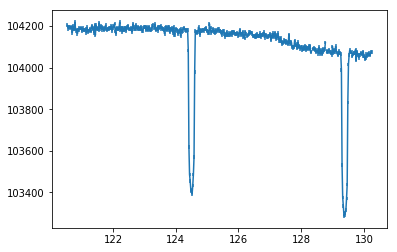

In [3]:
plt.errorbar(time,flux,yerr=flux_err)
plt.show()

In [4]:
np.where((time>124) & (time<125))

(array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218]),)

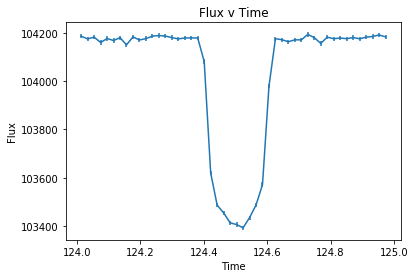

In [142]:
plt.errorbar(time[170:218],flux[170:218],yerr=flux_err[170:218])
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux v Time")
plt.show()

In [485]:
def clipping(flux_range):
    flux_range1=[]
   
    for i in flux_range:
        a=np.absolute((i-np.average(flux_range))/np.std(flux_range))
        if a <= 2:
            flux_range1.append(i)
    
    flux_mean=np.average(flux_range1)
    sigma_prime=np.std(flux_range1)
    return flux_mean,flux_range1, sigma_prime

In [486]:
flux_range=flux[170:218]
for i in range(6):
        flux_mean,flux_range,sigma_prime=clipping(flux_range)

In [487]:
len(flux_range)

31

In [592]:
Z=[] # t-t0/ ((.5 the width of the transit) #assumig the width of transit is aprox .2
for x in time[170:218]:
    a=x-124.51
    a=a/float(.1)
    Z.append(a)
    
p=0.0775


def delta(r,p,z):
    z=np.absolute(z)
    if r>= z+p or r<=z-p:
        d=0
    elif r+z<=p:
        d=1
    else:
        d= 1/np.pi*np.arccos((z**2-p**2+r**2)/(2*z*r))
    return d 

def fun(x):
    u=(1-x**2)**(1.0/2.0)
    w=1-u**(1.0/2.0)
    f_x=(1-w)*2*x
    return f_x


def fun2(x,y,z):
    u=(1-x**2)**(1.0/2.0)
    w=1-u**(1.0/2.0)
    f_x=(1-delta(x,y,z))*(1-w)*2*x
    return f_x
        
raf=[] 
for i in range(len(Z)):
    top=integrate.quad(fun2,0.0,1.0,args=(p,Z[i]))
    raf.append(top)   
bottom=integrate.quad(fun,0,1.0)
bot=np.asarray(bottom[0])


In [593]:
bot

array(0.7999999999999982)

In [594]:
flux_ratio=raf

In [595]:
f_r=[]
for i in range(len(flux_ratio)):
    abs=np.delete(flux_ratio[i],1,0)
    f_r.append(abs)

f_r=np.asarray(f_r)  
f_r=np.concatenate(f_r)

In [596]:
f_r=f_r/bot

In [597]:
f_r

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.99490342,  0.99357217,  0.99295949,  0.99263701,  0.99250547,
        0.99253549,  0.99273335,  0.99314721,  0.99393552,  0.99667521,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

In [598]:
print('average flux after 5 runs',flux_mean)
f_i=np.asarray(flux[170:218])/flux_mean
flux_error=flux_err[170:218]/flux_mean

('average flux after 5 runs', 104179.52)


In [599]:
chi2=[]
for i in range(len(f_i)):
    chi=((f_i[i]-f_r[i])/flux_error[i])**2
    chi2.append(chi)
chi2=np.asarray(chi2)
ki=np.sum(chi2)

In [600]:
flux_error

array([  8.55168619e-05,   8.55132530e-05,   8.55148319e-05,
         8.55096005e-05,   8.55134203e-05,   8.55113685e-05,
         8.55138496e-05,   8.55043108e-05,   8.55160324e-05,
         8.55109975e-05,   8.55135731e-05,   8.55163889e-05,
         8.55178951e-05,   8.55174949e-05,   8.55148974e-05,
         8.55097023e-05,   8.55079852e-05,   8.55081380e-05,
         8.55142425e-05,   8.54821410e-05,   8.53201927e-05,
         8.52766316e-05,   8.52661469e-05,   8.52521771e-05,
         8.52498852e-05,   8.52450539e-05,   8.52584490e-05,
         8.52765879e-05,   8.53059319e-05,   8.54415848e-05,
         8.55098697e-05,   8.55082690e-05,   8.55069084e-05,
         8.55120597e-05,   8.55055841e-05,   8.55196267e-05,
         8.55083781e-05,   8.55045291e-05,   8.55100589e-05,
         8.55150938e-05,   8.55112230e-05,   8.55109465e-05,
         8.55086691e-05,   8.55094404e-05,   8.55116086e-05,
         8.55093749e-05,   8.55191320e-05,   8.55089384e-05], dtype=float32)

In [601]:
f_i

array([ 1.0000701 ,  0.99996364,  1.00003469,  0.99982256,  0.99997723,
        0.99990153,  1.00001287,  0.99972653,  1.00004268,  0.9999215 ,
        0.99997455,  1.00007474,  1.00009656,  1.00007832,  1.00001669,
        0.99996406,  1.0000006 ,  1.00000393,  0.99999917,  0.99906433,
        0.99462581,  0.99334508,  0.99303746,  0.99264228,  0.99257112,
        0.99244446,  0.99284583,  0.99334854,  0.99416196,  0.99808228,
        0.99997067,  0.99993283,  0.99985063,  0.999928  ,  0.99992365,
        1.00014365,  1.00001371,  0.99978495,  1.00003326,  0.99997061,
        0.99999917,  0.99997288,  1.00001776,  0.99996865,  1.00003242,
        1.00005734,  1.00012136,  1.00004566], dtype=float32)

In [602]:
flux_mean

104179.52

In [603]:
ki# chi sqaured 

464.7793259882161

# Problem 2

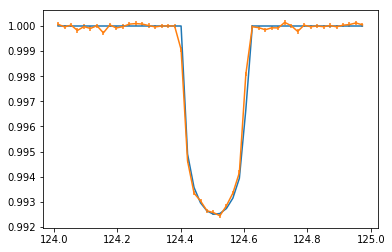

In [604]:
plt.errorbar(time[170:218],f_r)
plt.errorbar(time[170:218],flux[170:218]/flux_mean,yerr=flux_error)

plt.show()

In [605]:
# yes I think it is a good fit

In [625]:
v=48.0
m=3.0
nu=v-m
a=v/2.0
def qtop(t):
    f_t=np.exp(-t)*t**(a-1)
    return f_t
def qbot(t):
    f_t=np.exp(-t)*t**(a-1)
    return f_t
ki2=ki/2.0
print(ki,ki2)
zero=np.float(0)
q_top=integrate.quad(qtop,ki2,np.inf)
q_bottom=integrate.quad(qbot,zero,np.inf)

(464.7793259882161, 232.38966299410805)


In [626]:
qt=np.asarray(q_top[0])
qb=np.asarray(q_bottom[0])
Q=qt/qb

In [627]:
Q

1.348900739372943e-69

In [536]:
tau=np.arange(0.08,0.131,.001)

In [537]:
tau

array([ 0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
        0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,
        0.112,  0.113,  0.114,  0.115,  0.116,  0.117,  0.118,  0.119,
        0.12 ,  0.121,  0.122,  0.123,  0.124,  0.125,  0.126,  0.127,
        0.128,  0.129,  0.13 ])

In [611]:
ki_sqr=[]
for i in range(len(tau)):
    Z=[] 
    for x in time[170:218]:
        a=x-124.51
        a=a/float(tau[i])
        Z.append(a)
    raf=[]  
    for i in range(len(Z)):
        top=integrate.quad(fun2,0.0,1.0,args=(p,Z[i]))
        raf.append(top) 
    raf=np.asarray(raf/bot)
    f_r=[]
    for i in range(len(raf)):
        abs=np.delete(raf[i],1,0)
        f_r.append(abs)

    f_r=np.asarray(f_r)  
    f_r=np.concatenate(f_r)
    kisqr=np.sum(((f_i-f_r)/flux_error)**2)
    ki_sqr.append(kisqr)

In [612]:
ki_sqr

[5368.6964637670308,
 5155.4673370523824,
 5007.5341001009647,
 4749.2271557886052,
 4382.2722667755006,
 3953.2920291383816,
 3496.0195568727891,
 3036.9164365921288,
 2596.6297330204507,
 2190.2552745688181,
 1785.7004288999794,
 1393.0787789313131,
 1039.033309537409,
 740.76294812080891,
 509.16728269386931,
 349.97189031705147,
 267.29728107432965,
 245.93495675404233,
 274.81650734042773,
 349.5916395379586,
 464.77932598815443,
 611.12418893881772,
 760.70659372688453,
 907.20040851336228,
 1035.4199333387446,
 1132.4226850160767,
 1233.4788997780079,
 1349.5591546547892,
 1487.0948564977668,
 1650.1656355033465,
 1844.2067099312164,
 2074.6594118644493,
 2345.3134213247722,
 2657.8101055153538,
 3011.2069926823597,
 3401.6482134644693,
 3821.6839247437119,
 4258.3609802915344,
 4681.0230518993949,
 5086.621638569145,
 5499.7725881490924,
 5922.2541818559675,
 6354.3588983164009,
 6794.3999158405859,
 7238.6683569739744,
 7679.5022024573791,
 8099.2035449739178,
 8470.3324967667

In [614]:
tau[17] # is the tau that coresponds to the smallest chi squared value

0.097000000000000017

In [615]:
ki_sqr[17]

245.93495675404233

In [628]:
ka=ki_sqr[17]/2
q_top1=integrate.quad(qtop,ka,np.inf)

In [629]:
qt1=np.asarray(q_top1)

In [630]:
Q1=qt1[0]/qb

In [631]:
Q1

2.1754100745529475e-28

In [632]:
Z_1=[] # t-t0/ ((.5 the width of the transit) #assumig the width of transit is aprox .2
for x in time[170:218]:
    a=x-124.51
    a=a/float(0.097000000000000017)
    Z_1.append(a)
    
p=0.0775



raf_1=[] 
for i in range(len(Z_1)):
    top=integrate.quad(fun2,0.0,1.0,args=(p,Z_1[i]))
    raf_1.append(top)   



In [634]:
raf_1=np.asarray(raf_1)
f_r1=[]
for i in range(len(raf_1)):
    abs=np.delete(raf_1[i],1,0)
    f_r1.append(abs)

f_r1=np.asarray(f_r1/bot)  
f_r1=np.concatenate(f_r1)

In [635]:
f_r1

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.99525493,  0.9936607 ,  0.99299172,  0.99264602,  0.99250594,
        0.99253787,  0.9927489 ,  0.99319474,  0.99406873,  0.99779778,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

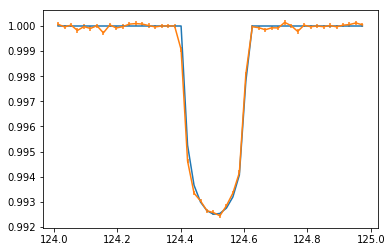

In [636]:
plt.errorbar(time[170:218],f_r1)
plt.errorbar(time[170:218],flux[170:218]/flux_mean,yerr=flux_error)

plt.show()

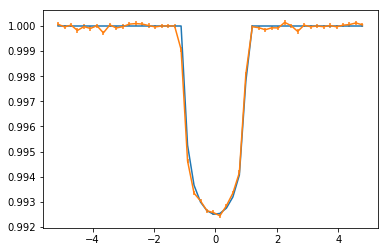

In [642]:
plt.plot(Z_1,f_r1)
plt.errorbar(Z_1,flux[170:218]/flux_mean,yerr=flux_error)

plt.show()


plt.show()

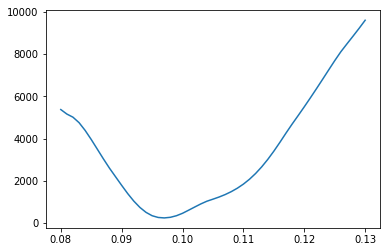

In [648]:
plt.plot(tau,ki_sqr)
plt.show()

In [646]:
tau

array([ 0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
        0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
        0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
        0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,
        0.112,  0.113,  0.114,  0.115,  0.116,  0.117,  0.118,  0.119,
        0.12 ,  0.121,  0.122,  0.123,  0.124,  0.125,  0.126,  0.127,
        0.128,  0.129,  0.13 ])